#Create and train the RNN model

In [ ]:
# Split the subset into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_processed, y_encoded, test_size=0.1, random_state=42)

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_processed.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20)

Epoch 1/20
1725/1725 [==============================] - 6s 3ms/step - loss: 0.6678 - accuracy: 0.7207 - val_loss: 0.5938 - val_accuracy: 0.7479
Epoch 2/20
1725/1725 [==============================] - 4s 2ms/step - loss: 0.5803 - accuracy: 0.7560 - val_loss: 0.5657 - val_accuracy: 0.7549
Epoch 3/20
1725/1725 [==============================] - 4s 2ms/step - loss: 0.5638 - accuracy: 0.7576 - val_loss: 0.5542 - val_accuracy: 0.7559
Epoch 4/20
1725/1725 [==============================] - 4s 2ms/step - loss: 0.5566 - accuracy: 0.7586 - val_loss: 0.5499 - val_accuracy: 0.7575
Epoch 5/20
1725/1725 [==============================] - 3s 2ms/step - loss: 0.5522 - accuracy: 0.7587 - val_loss: 0.5449 - val_accuracy: 0.7597
Epoch 6/20
1725/1725 [==============================] - 5s 3ms/step - loss: 0.5489 - accuracy: 0.7590 - val_loss: 0.5435 - val_accuracy: 0.7595
Epoch 7/20
1725/1725 [==============================] - 9s 5ms/step - loss: 0.5465 - accuracy: 0.7596 - val_loss: 0.5415 - val_accuracy:

##Save Model

In [ ]:
model.save('RNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('RNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Evaluate RNN Model

In [ ]:
# Evaluate the model on the validation set
_, accuracy = model.evaluate(X_val, y_val)

print(f"Accuracy: {accuracy * 100:.2f}%")

192/192 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7585
Accuracy: 75.85%


In [ ]:
#y_val_pred_prob = model.predict(X_val)
#y_val_pred = np.argmax(y_val_pred_prob, axis=1)

In [ ]:
#y_val = y_val.reshape(614,1)

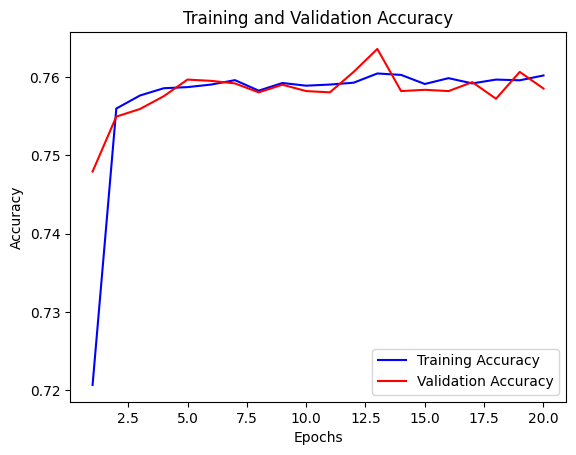

In [ ]:
# Get the accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

192/192 [==============================] - 1s 6ms/step


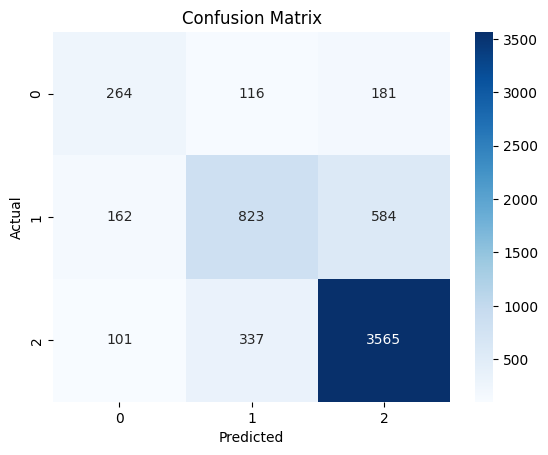

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_val_pred_prob = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_val)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict probabilities on the test set
y_test_pred_prob = model.predict(X_val)

# Convert predicted probabilities to predicted labels
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_val, y_test_pred)
test_precision = precision_score(y_val, y_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_val, y_test_pred, average='macro')
test_f1 = f1_score(y_val, y_test_pred, average='macro')

# Calculate and print the average evaluation metrics for the test set
print('Average Test Accuracy:', np.mean(test_accuracy))
print('Average Test Precision:', np.mean(test_precision))
print('Average Test Recall:', np.mean(test_recall))
print('Average Test F1 Score:', np.mean(test_f1))

192/192 [==============================] - 0s 1ms/step
Average Test Accuracy: 0.7585194847546062
Average Test Precision: 0.6564195759087168
Average Test Recall: 0.6285694069966651
Average Test F1 Score: 0.6398290727452525
